<a href="https://colab.research.google.com/github/Leonie622/Chinese-Word-Vectors/blob/master/Image_Generation%26Color_Reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dalle2 Image Generation

In [ ]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
!pip install dalle2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from dalle2 import Dalle2

# change this to your bearer token
dalle = Dalle2("sess-CdHI9N1XbUKpYrXFbpH6BOwD4JiNlhDK9LeXk8a9") 

In [ ]:
img_dir = '/content/gen-demo-v1/static'

In [ ]:
#generations = dalle.generate("portal to another dimension, digital art")
generations = dalle.generate_and_download("Soda water, minimalism, summer",img_dir)
print(generations)

In [ ]:
print(generations)

['/content/gen-demo-v1/static/generation-GtgJPvHcm57c1m4QURir02DU.webp', '/content/gen-demo-v1/static/generation-JQbBwxJUyvblWGefkacO0bBU.webp', '/content/gen-demo-v1/static/generation-9ZpYgRGl1ItzwsoCERSHTKmP.webp', '/content/gen-demo-v1/static/generation-m93O22E76HGf8XAfn13YOK7u.webp']


In [ ]:
pip install Pillow==3.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 330.2 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for Pillow: filename=Pillow-3.2.0-cp38-cp38-macosx_10_9_x86_64.whl size=470161 sha256=0727c036057594115b58884a1b9d7d9b8b7ba26751b3920e8911c07c96461638
  Stored in directory: /Users/leon/Library/Caches/pip/wheels/3f/fa/56/5490cd337ad5c2c04000fdf4ae4d6116d6ca03ff1b64b2d535
Successfully built Pillow
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
      Successfully uninstalled Pillow-8.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.12.0 requires pillow!=8.3.*,>=5.3.0, but you have pillow 3.2.0 which is incompatible.
scikit-image 0.18.1 requires pillow!=7.1.0,!=7.1.1,>=4.3.0, but you have pillow 3.2.0 which is incompatible.
matplotlib 3.3.4 r

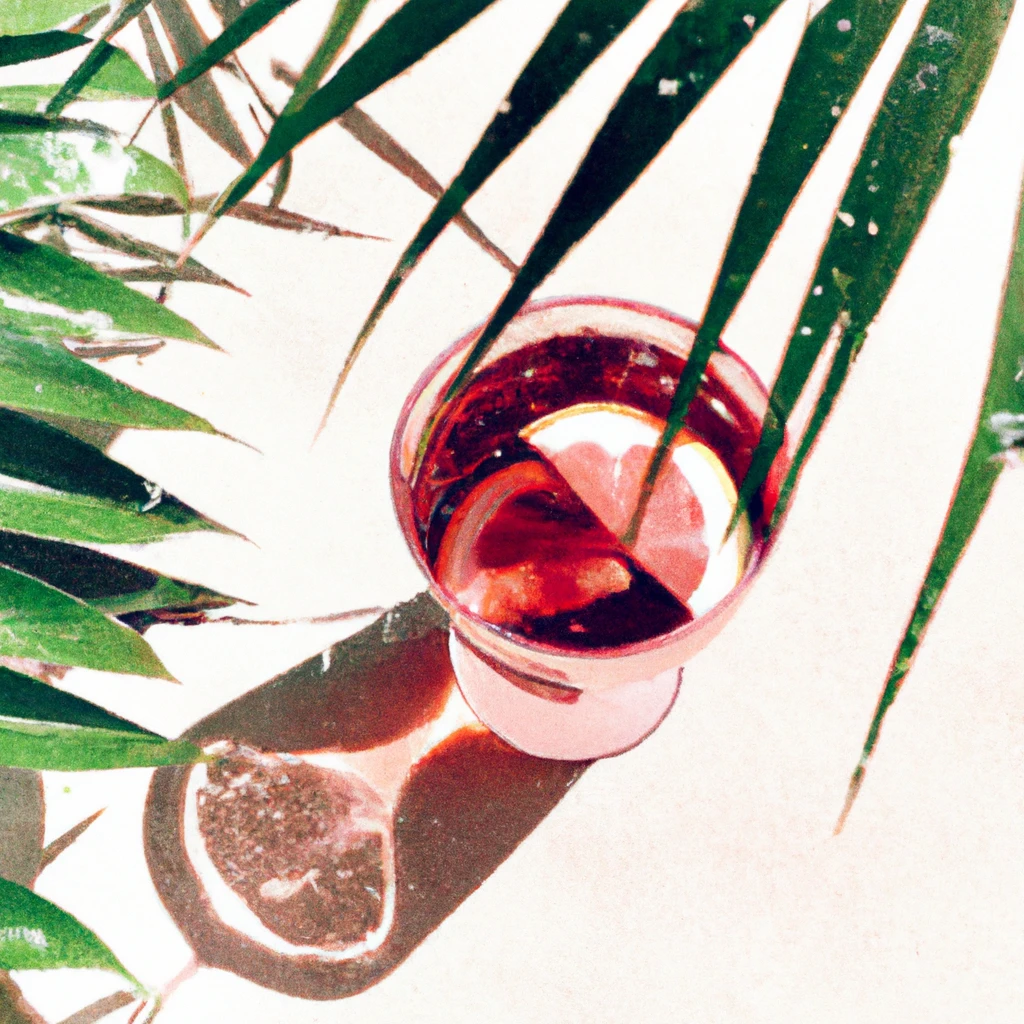

In [ ]:
from PIL import Image
img_url = generations[0]
img = Image.open(img_url) 
img

#### If running in jupyter, run the following code to read the webp file

In [ ]:
pip install webp

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import webp
img_url = generations[1]
img = webp.load_image(img_url)
img

# Color extraction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
 
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
!pip install extcolors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 5.1 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [ ]:
!pip install easydev                 #version 0.12.0
!pip install colormap                #version 1.0.4
!pip install opencv-python           #version 4.5.5.64
!pip install colorgram.py            #version 1.2.0
!pip install extcolors               #version 1.0.0
 
import cv2
import extcolors
 
from colormap import rgb2hex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.6 MB/s 
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=c7035163dd5c73fb4f231ea9edd7abf3e4437bbbe00442e7c32e362696868efd
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built easydev
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for colormap: filename=colormap-1.0.4-py3-none-any.whl size=15637 sha256=04ee82c36fb846ad607dba4445de1806a5ca336c5c01304740651ccf5e247787
  Stored in directory: /root/.cache/pip/wheels/71/35/4b/259c328e39ede29b184e4ffe4443bcc2be4e475178a83794c3
Successfully built colormap
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/

In [ ]:
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 4)
colors_x

([((251, 249, 245), 547854),
  ((0, 50, 40), 42710),
  ((250, 208, 202), 41736),
  ((168, 125, 112), 38883)],
 1048576)

In [ ]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df
 
df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#FBF9F5,547854
1,#003228,42710
2,#FAD0CA,41736


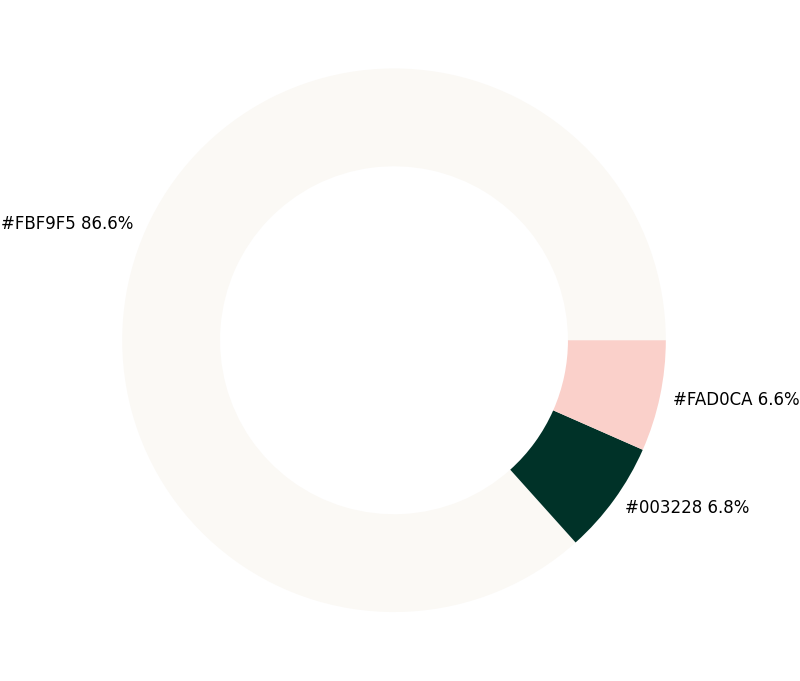

In [ ]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)
 
#create space in the center
plt.setp(wedges, width=0.36)
 
ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

In [ ]:
list_color

['#FBF9F5', '#003228', '#FAD0CA']

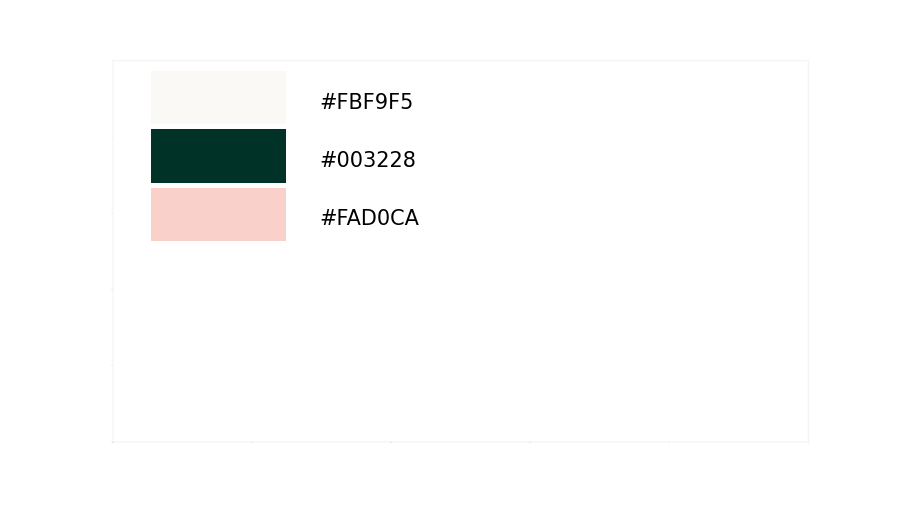

In [ ]:
#create background color
fig, ax = plt.subplots(figsize=(192,108),dpi=10)
fig.set_facecolor('white')
plt.savefig('bg.png')
plt.close(fig)
 
#create color palette
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi = 10)
ax = fig.add_subplot(1,1,1)
 
x_posi, y_posi, y_posi2 = 320, 25, 25
for c in list_color:
    if  list_color.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
ax.axis('off')
plt.imshow(bg)
plt.tight_layout()


# Colour reconstruction

In [ ]:
#Darken the colour for the font colour
def color_variant(hex_color, brightness_offset=-60):  
    """ takes a color like #87c95f and produces a lighter or darker variant """  
    if len(hex_color) != 7:  
        raise Exception("Passed %s into color_variant(), needs to be in #87c95f format." % hex_color)  
    rgb_hex = [hex_color[x:x+2] for x in [1, 3, 5]]  
    new_rgb_int = [int(hex_value, 16) + brightness_offset for hex_value in rgb_hex]  
    new_rgb_int = [min([255, max([0, i])]) for i in new_rgb_int] # make sure new values are between 0 and 255  
    # hex() produces "0x88", we want just "88"  
    return "#" + "".join([hex(i)[2:] for i in new_rgb_int]) 

In [ ]:
dark_color = color_variant(list_color[0])
dark_color


'#bfbdb9'

In [ ]:
list_color

['#FBF9F5', '#003228', '#FAD0CA']

In [ ]:
import colorsys
from PIL import ImageColor


def transform_color(main_color, color_patch):
    """Change the given colour on the colour wheel

    @param main_color A hex representation of a given colour, e.g. #ff0000 (red)
    @param color_patch Chromatic differences, ternary (dH, S, L).
    - dH range 0 to 360, indicating the counterclockwise rotation angle of the colour on the colour wheel.
    - S (Saturation) and L (Lightness) range 0 to 100, indicating the saturation and brightness of the target colour

    @returns hex representation of the target colour

    @see https://hslpicker.com/ The results can be verified on this website
    """
    r, g, b = ImageColor.getrgb(main_color)
    h, l, s = colorsys.rgb_to_hls(r/256., g/256., b/256.)
    h += color_patch[0] / 360.
    if color_patch[1] >= 0: s = color_patch[1] / 100.
    if color_patch[2] >= 0: l = color_patch[2] / 100.
    h -= int(h)
    if h < 0: h += 1
    return '#' + ''.join(['%02x' % round(v * 256.) for v in colorsys.hls_to_rgb(h, l, s)])


if __name__ == '__main__':
    # Rotate the primary colour #xxxxxx 30 degrees counterclockwise on the colour wheel, set the saturation to 40% and the brightness to 50%
    print("Analogous color-text color:")
    print(transform_color(list_color[1], (30, 40, 20))) #analogous combination
    print("Analogous color-background color:")
    print(transform_color(list_color[0], (30, 30, 60))) #analogous combination

Analogous color-text color:
#1f3b48
Analogous color-background color:
#aeb87b


In [ ]:
    # Rotate the primary colour #xxxxxx 30 degrees counter-clockwise on the colour wheel, without changing saturation or brightness
    print(transform_color('#FBF9F5', (30, -1, -1)))

#fafbf5


In [ ]:
if __name__ == '__main__':
    # Rotate the primary colour #xxxxxx 180 degrees counterclockwise on the colour wheel, set the saturation to 40% and the brightness to 50%
    print("Complementary color-text color:")
    print(transform_color(list_color[1], (180,40,20))) #complementary combination
    print("Complementary color-background color:")
    print(transform_color(list_color[0], (180,30,60))) #complementary combination

Complementary color-text color:
#481f27
Complementary color-background color:
#7b8fb8


In [ ]:
if __name__ == '__main__':
    # Colour scheme for the "fashion" template
    print("Analogous color-text color:")
    print(transform_color(list_color[1], (0, -1, 5))) #analogous combination
    print("Analogous color-background color:")
    print(transform_color(list_color[0], (0, -1, -1))) #analogous combination
    print("Analogous color-background color 2:")
    print(transform_color(list_color[2], (0, 90, 60))) #analogous combination

Analogous color-text color:
#001a14
Analogous color-background color:
#fbf9f5
Analogous color-background color 2:
#f6543d


In [ ]:
if __name__ == '__main__':
    # Colour scheme for the "nature" template
    print("Analogous color-text color:")
    print(transform_color(list_color[1], (160, 70, 70))) #analogous combination
    print("Analogous color-background color:")
    print(transform_color(list_color[0], (0, -1, -1))) #analogous combination

Analogous color-text color:
#e97db7
Analogous color-background color:
#fbf9f5
